In [12]:
% load_ext autoreload
% autoreload 2

import hydra
from hydra import initialize, compose
from hydra.core.hydra_config import HydraConfig

from predict import predict

% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read Config File

In [21]:
# clear previous hydra instances
hydra.core.global_hydra.GlobalHydra.instance().clear()

initialize(version_base=None, config_path="configs")
cfg = compose(config_name="config", return_hydra_config=True)
HydraConfig().cfg = cfg
# cfg = OmegaConf.to_yaml(cfg)

In [29]:
images_paths = [
    "H:\\Projects\\UNet3P\\data\\val\images\\image_0_48.png",
    "H:\\Projects\\UNet3P\\data\\val\\images\\image_0_20.png",
    "H:\\Projects\\UNet3P\\data\\val\images\\image_0_21.png",
]
mask_paths = [
    "H:\\Projects\\UNet3P\\data\\val\\mask\\mask_0_48.png",
    "H:\\Projects\\UNet3P\\data\\val\\mask\\mask_0_20.png",
    "H:\\Projects\\UNet3P\\data\\val\\imask\\mask_0_21.png",
]

In [30]:
cfg.DATASET.VAL.IMAGES_PATH = images_paths
cfg.DATASET.VAL.MASK_PATH = mask_paths

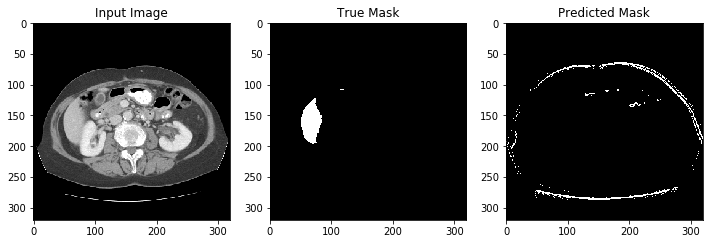

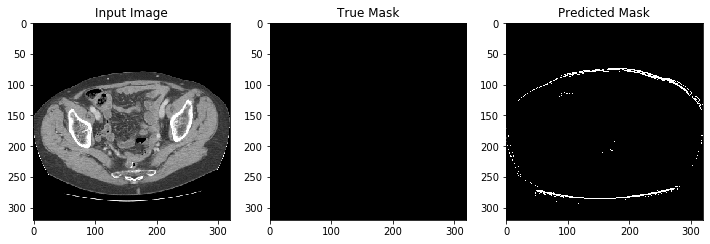

In [31]:
predict(cfg)